# Mathematics and Python
## Week 3
### Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

https://docs.scipy.org/doc/scipy/reference/optimize.html<br>
https://matplotlib.org/users/index.html

### Задача 1. Минимизация гладкой функции

In [103]:
import numpy as np
import math
from scipy import optimize
from matplotlib import pylab as plt

Рассмотрим все ту же функцию из задания по линейной алгебре: $f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)$, но теперь уже на промежутке [1, 30]<br><br>
Напишите на Питоне функцию, вычисляющую значение $f(x)$ по известному $x$. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции $sin$ и $exp$ нужно импортировать из модуля ```math```.

In [104]:
def f(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5. * np.exp(-x / 2.)

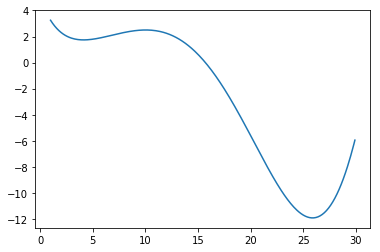

In [105]:
x = np.arange(1., 30., 0.1)
y = f(x)
plt.plot(x, y)
plt.show()

Попробуйте найти минимум, используя стандартные параметры в функции `scipy.optimize.minimize` (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат. 

In [106]:
optimize.minimize(f, 25.)

      fun: -11.89889466596626
 hess_inv: array([[1.67418754]])
      jac: array([-4.29153442e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([25.88018592])

Укажите в `scipy.optimize.minimize` в качестве метода `BFGS` (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения `x=2`. Градиент функции при этом указывать не нужно – он будет оценен численно.

In [107]:
optimize.minimize(f, x0=2, method='BFGS')

      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])

Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [108]:
fun = float(optimize.minimize(f, x0=2, method='BFGS')['fun'])
print(fun)

1.74526829034


In [109]:
with open('submission-1.txt', 'w') as file:
    #file.write('{}'.format(str(fun)[:4]))
    file.write('{}'.format(str(fun)[:4]))

In [110]:
!cat submission-1.txt

1.74

Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [111]:
fun = float(optimize.minimize(f, x0=30, method='BFGS')['fun'])
print(fun)

-11.898894666


In [112]:
with open('submission-1.txt', 'a') as file:
    file.write(' {}'.format(str(fun)[:6]))

In [113]:
!cat submission-1.txt

1.74 -11.89

### Задача 2. Глобальная оптимизация

Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

In [114]:
optimize.differential_evolution(f, [(1,30)])

     fun: array([-11.89889467])
     jac: array([7.10542736e-07])
 message: 'Optimization terminated successfully.'
    nfev: 111
     nit: 6
 success: True
       x: array([25.88019389])

In [115]:
with open('submission-2.txt', 'w') as file:
    file.write('{}'.format(str(fun)[:6]))

In [116]:
!cat submission-2.txt

-11.89

### Задача 3. Минимизация негладкой функции

Теперь рассмотрим функцию $h(x) = int(f(x))$ на том же отрезке [1, 30], т.е. теперь каждое значение $f(x)$ приводится к типу `int` и функция принимает только целые значения.<br>

In [117]:
def h(x):
    return np.array([int(i) for i in f(x)])

Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график $h(x)$ с помощью `matplotlib`.

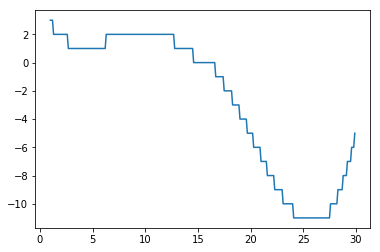

In [118]:
x = np.arange(1., 30., 0.1)
y = h(x)
plt.plot(x, y)
plt.show()

Попробуйте найти минимум функции $h(x)$ с помощью `BFGS`, взяв в качестве начального приближения `x=30`. Получившееся значение функции – ваш первый ответ в этой задаче.

In [119]:
fun = float(optimize.minimize(h, x0=30, method='BFGS')['fun'])
print(fun)

-5.0


In [120]:
with open('submission-3.txt', 'w') as file:
    file.write('{}'.format(str(fun)[:4]))

In [121]:
!cat submission-3.txt

-5.0

Теперь попробуйте найти минимум $h(x)$ на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции $h(x)$ в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [123]:
optimize.differential_evolution(h, [(1,30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([26.62355514])

In [125]:
fun = optimize.differential_evolution(h, [(1,30)])['fun']

In [126]:
with open('submission-3.txt', 'a') as file:
    file.write(' {}'.format(str(fun)[:6]))

In [127]:
!cat submission-3.txt

-5.0 -11.0

Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.